# 🐧 SVM Classification on Penguin Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


Matplotlib created a temporary cache directory at C:\Users\Nike\AppData\Local\Temp\matplotlib-fo6szsex because the default path (C:\Users\Nike\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
# Load the dataset
df = pd.read_csv('penguins (1).csv')
df.head()


,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [7]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Encode the target labels
df['species_encoded'] = df['y'].astype('category').cat.codes


In [9]:
# Define features and target
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]
y = df['species_encoded']


In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [19]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Generate classification report
species_names = df['y'].astype('category').cat.categories
class_report = classification_report(y_test, y_pred, target_names=species_names)
print("Classification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        50
   Chinstrap       0.95      0.95      0.95        19
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103



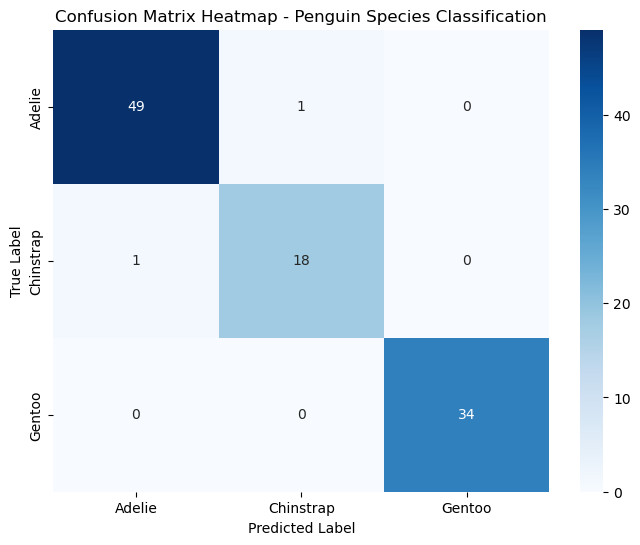

In [21]:
# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names,
            yticklabels=species_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap - Penguin Species Classification')
plt.show()
